In [ ]:
import requests 
import json
import pandas as pd
from typing import Annotated
import os

CACHE_PATH = os.path.join(os.path.dirname(os.path.abspath(__file__)), ".cache")
RAG_API = 'https://container-finrobot.dc4gg5b1dous0.eu-west-3.cs.amazonlightsail.com'

class AnnualReportRAG:

    def get_annual_report_section(
        ticker_symbol: Annotated[str, "ticker symbol"],
        fyear: Annotated[int, "fiscal year of the annual report"],
        section: Annotated[
            int,
            "Section of the Annual Report [1, 2]",
        ],
        save_path: SavePathType = None,
    ) -> str:
        """
        Get a specific section of the Annual Report RAG API.
        """

        sections_dict = {
            'MRF': {
                '1': 'MANAGEMENT DISCUSSION AND ANALYSIS',
                '2': "BOARD'S REPORT",
                '3': "BALANCE SHEET",
                '4':"STATEMENT OF PROFIT AND LOSS",
                '5': "NOTES FORMING PART OF THE FINANCIAL STATEMENTS",
                '6': "CONSOLIDATED FINANCIAL STATEMENTS"
            },

            'DMART': {
                '1':  'Management Discussion and Analysis',
                '2': "Directors’ Report",
                '3': "Standalone Balance Sheet",
                '4': "Statement of Standalone Profit and Loss",
                '5': "Statement of Standalone Cash Flows"
            }
        }

        section_title = sections_dict[ticker_symbol][str(section)]
        print(section_title)

        payload ={
            "ticker":ticker_symbol,
            "year": fyear,
            "section": section_title
        }

        response = requests.post(f'{RAG_API}/extract_section', json=payload)
        response.raise_for_status()
        section_text = response.json()

        if save_path:
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            with open(save_path, "w") as f:
                f.write(section_text)

        return section_text
    

    def perform_similarity_search(
        ticker_symbol: Annotated[str, "ticker symbol"],
        fyear: Annotated[int, "fiscal year of the annual report"],
        section: Annotated[
            int,
            "Section of the Annual Report [1, 2, 3, 4, 5]",
        ],
        question: Annotated[
            str,
            "question or prhase to look by embeddings similarity search",
        ],
        save_path: SavePathType = None,
    ) -> str:
        """
        Get a specific section of the Annual Report RAG API and perform similarity search based on a question.
        """

        sections_dict = {
            'MRF': {
                '1': 'MANAGEMENT DISCUSSION AND ANALYSIS',
                '2': "BOARD'S REPORT",
                '3': "BALANCE SHEET",
                '4':"STATEMENT OF PROFIT AND LOSS",
                '5': "NOTES FORMING PART OF THE FINANCIAL STATEMENTS",
                '6': "CONSOLIDATED FINANCIAL STATEMENTS"
            },

            'DMART': {
                '1':  'Management Discussion and Analysis',
                '2': "Directors’ Report",
                '3': "Standalone Balance Sheet",
                '4': "Statement of Standalone Profit and Loss",
                '5': "Statement of Standalone Cash Flows"
            }
        }

        section_title = sections_dict[ticker_symbol][str(section)]

        payload ={
            "ticker":ticker_symbol,
            "year": fyear,
            "section": section_title,
            "question": question,
            "k": 10
        }

        response = requests.post(f'{RAG_API}/query', json=payload)
        response.raise_for_status()
        section_text = response.json()

        if save_path:
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            with open(save_path, "w") as f:
                f.write(section_text)

        return section_text

In [1]:
from tools.report_utils_india import *
import os
from tools.global_API_toolkit import make_api_request2, save_to_file    

path = "./TEST"

if not os.path.exists(path):
    os.makedirs(path)


get_indian_historical_prices("DMART", os.path.join(path, "tcs_key_metrics.json"))


Fetching historical prices for DMART...
No datasets found in API response.


""


In [4]:
make_api_request2("IndianMarket", "/stock", {"name": "DMART"})



{'companyName': 'Avenue Supermarts Ltd',
 'industry': 'Retail (Grocery)',
 'companyProfile': {'companyDescription': 'Avenue Supermarts Limited is an India-based company, which is engaged in the business of organized retail and operating supermarkets under the DMart brand name. DMart is a supermarket chain that offers customers a range of products with a focus on the foods, non-foods fast-moving consumer goods (FMCG) and general merchandise and apparel product categories. Its stores stock home utility products, including food, toiletries, beauty products, garments, kitchenware, bed and bath linen, home appliances and others. The Company offers its products under various categories, such as bed and bath, dairy and frozen, fruits and vegetables, crockery, toys and games, kids’ apparel, ladies’ garments, apparel for men, home and personal care, daily essentials, grocery, and staples. DMart operates approximately 365 stores and has a presence across Maharashtra, Gujarat, Andhra Pradesh, Mad

In [1]:
from tools.report_utils_india import *
import os
from tools.global_API_toolkit import make_api_request2, save_to_file    

path = "./TEST"

if not os.path.exists(path):
    os.makedirs(path)

full_url = "https://stock.indianapi.in"  # adapt as needed
params = {"stock_name": 'DMART', "period": "max", 'filter': "price"}
content = make_api_request2("IndianMarket", '/historical_data', params)
content

{'datasets': [{'metric': 'Price',
   'label': 'Price on NSE',
   'values': [['2017-03-24', '616.90'],
    ['2017-03-31', '637.85'],
    ['2017-04-07', '751.20'],
    ['2017-04-13', '783.25'],
    ['2017-04-21', '743.20'],
    ['2017-04-28', '736.50'],
    ['2017-05-05', '808.90'],
    ['2017-05-12', '751.80'],
    ['2017-05-19', '722.90'],
    ['2017-05-26', '714.90'],
    ['2017-06-02', '779.65'],
    ['2017-06-09', '802.35'],
    ['2017-06-16', '800.10'],
    ['2017-06-23', '801.60'],
    ['2017-06-30', '815.10'],
    ['2017-07-07', '895.45'],
    ['2017-07-14', '891.35'],
    ['2017-07-21', '914.75'],
    ['2017-07-28', '898.55'],
    ['2017-08-04', '911.35'],
    ['2017-08-11', '890.10'],
    ['2017-08-18', '926.25'],
    ['2017-08-24', '994.60'],
    ['2017-09-01', '1048.40'],
    ['2017-09-08', '1070.85'],
    ['2017-09-15', '1087.75'],
    ['2017-09-22', '1039.15'],
    ['2017-09-29', '1078.45'],
    ['2017-10-06', '1105.25'],
    ['2017-10-13', '1229.90'],
    ['2017-10-19', '1

In [10]:

params ={'name': 'DMART'}
content = make_api_request2("IndianMarket", '/stock', params)

In [11]:
content.keys()

dict_keys(['companyName', 'industry', 'companyProfile', 'currentPrice', 'stockTechnicalData', 'percentChange', 'yearHigh', 'yearLow', 'financials', 'keyMetrics', 'futureExpiryDates', 'futureOverviewData', 'initialStockFinancialData', 'analystView', 'recosBar', 'riskMeter', 'shareholding', 'stockCorporateActionData', 'stockDetailsReusableData', 'stockFinancialData', 'recentNews'])

In [ ]:
content.get('companyProfile').get('companyDescription')

'Avenue Supermarts Limited is an India-based company, which is engaged in the business of organized retail and operating supermarkets under the DMart brand name. DMart is a supermarket chain that offers customers a range of products with a focus on the foods, non-foods fast-moving consumer goods (FMCG) and general merchandise and apparel product categories. Its stores stock home utility products, including food, toiletries, beauty products, garments, kitchenware, bed and bath linen, home appliances and others. The Company offers its products under various categories, such as bed and bath, dairy and frozen, fruits and vegetables, crockery, toys and games, kids’ apparel, ladies’ garments, apparel for men, home and personal care, daily essentials, grocery, and staples. DMart operates approximately 365 stores and has a presence across Maharashtra, Gujarat, Andhra Pradesh, Madhya Pradesh, Karnataka, Telangana, and Chhattisgarh.'

In [14]:
content.get('keyMetrics').keys()

dict_keys(['mgmtEffectiveness', 'margins', 'financialstrength', 'valuation', 'incomeStatement', 'growth', 'persharedata', 'priceandVolume'])

In [21]:


fifty_two_week = [data  for data in content.get('keyMetrics').get('priceandVolume') if data.get('key') == '52WeekLow' or data.get('key') == '52WeekHigh']
lo, hi = [float(data.get('value')) for data in fifty_two_week]

In [2]:
get_key_data_india("DMART", save_path=os.path.join(path, "key_data.json"))

'Successfully saved to c:\\Users\\esteb\\OneDrive\\Escritorio\\Cursos y Materias\\FinRobot-Langgraph\\TEST\\key_data.json'

In [2]:
get_indian_historical_prices("DMART", start_date='2024-01-01', end_date= '2024-12-31',save_path=os.path.join(path, "histprices.json"))

Fetching historical prices for DMART...


'Successfully saved to c:\\Users\\esteb\\OneDrive\\Escritorio\\Cursos y Materias\\FinRobot-Langgraph\\TEST\\histprices.json'

In [2]:
get_company_profile("DMART", save_path=os.path.join(path, "company_profile.json"))

Fetching company profile for DMART from IndianAPI...


'Successfully saved to c:\\Users\\esteb\\OneDrive\\Escritorio\\Cursos y Materias\\FinRobot-Langgraph\\TEST\\company_profile.json'

In [3]:
get_competitor_analysis("DMART", save_path=os.path.join(path, "competitor_analysis.json"))

Fetching competitors for DMART from IndianAPI...


'Successfully saved to c:\\Users\\esteb\\OneDrive\\Escritorio\\Cursos y Materias\\FinRobot-Langgraph\\TEST\\competitor_analysis.json'

In [5]:
fin_statement = 'cash_flow_statement'

get_financial_statement('DMART', fin_statement, os.path.join(path, f'{fin_statement}.json'), 2024) 

Fetching cash_flow_statement for DMART from IndianAPI...


'Successfully saved to c:\\Users\\esteb\\OneDrive\\Escritorio\\Cursos y Materias\\FinRobot-Langgraph\\TEST\\cash_flow_statement.json'

In [2]:
get_indian_key_metrics_raw("DMART",save_path=os.path.join(path, "key_data.json"))

'Successfully saved to c:\\Users\\esteb\\OneDrive\\Escritorio\\Cursos y Materias\\FinRobot-Langgraph\\TEST\\key_data.json'

In [ ]:
import requests
from urllib.parse import urlencode
import pandas as pd


base_url = "https://stock.indianapi.in/historical_data" 
full_url = f"{base_url}?{urlencode(params)}"
api = os.getenv("INDIAN_API_KEY")
headers =  {'x-api-key': api}
response = requests.get(full_url, headers=headers)
parsed = response.json()

start_date = '2024-01-01'  # Fecha de inicio
end_date = '2024-12-31'    # Fecha de fin


# Extract historical data
table = None

for metric in parsed['datasets']:
    metric_name = metric['metric']
    data = metric['values']

    # Convertir a DataFrame
    if metric_name != "Volume":
        df = pd.DataFrame(data, columns=['Date', metric_name])
    else:
        data = [[row[0], row[1], row[2]['delivery']] for row in data]
        df = pd.DataFrame(data, columns=['Date', metric_name, 'delivery'])
    df['Date'] = pd.to_datetime(df['Date']) 

    if table is None:
        table = df
    else:
        table = pd.merge(table, df, on='Date', how='left')  # Puedes usar 'inner' si prefieres solo fechas comunes

# Ordenar y filtrar por fecha si es necesario
table = table.sort_values('Date').reset_index(drop=True)
if start_date is not None and end_date is not None:
    table =  table[
(table['Date'] >= pd.to_datetime(start_date)) & 
(table['Date'] <= pd.to_datetime(end_date))
]

In [6]:
content = make_api_request2("IndianMarket", "/stock", {"name": 'DMART'})

content = content.get('companyProfile', content)
print(content)

interesting_keys = ['companyDescription', 'mgIndustry']

content_parsed = {'companyDescription': content.get('companyDescription', ''),
                  'mgIndustry': content.get('mgIndustry', ''), 'metrics': content.get('peerCompanyList', {})[0]}
content_parsed


{'companyDescription': 'Avenue Supermarts Limited is an India-based company, which is engaged in the business of organized retail and operating supermarkets under the DMart brand name. DMart is a supermarket chain that offers customers a range of products with a focus on the foods, non-foods fast-moving consumer goods (FMCG) and general merchandise and apparel product categories. Its stores stock home utility products, including food, toiletries, beauty products, garments, kitchenware, bed and bath linen, home appliances and others. The Company offers its products under various categories, such as bed and bath, dairy and frozen, fruits and vegetables, crockery, toys and games, kids’ apparel, ladies’ garments, apparel for men, home and personal care, daily essentials, grocery, and staples. DMart operates approximately 365 stores and has a presence across Maharashtra, Gujarat, Andhra Pradesh, Madhya Pradesh, Karnataka, Telangana, and Chhattisgarh.', 'mgIndustry': 'Retail (Grocery)', 'isI

{'companyDescription': 'Avenue Supermarts Limited is an India-based company, which is engaged in the business of organized retail and operating supermarkets under the DMart brand name. DMart is a supermarket chain that offers customers a range of products with a focus on the foods, non-foods fast-moving consumer goods (FMCG) and general merchandise and apparel product categories. Its stores stock home utility products, including food, toiletries, beauty products, garments, kitchenware, bed and bath linen, home appliances and others. The Company offers its products under various categories, such as bed and bath, dairy and frozen, fruits and vegetables, crockery, toys and games, kids’ apparel, ladies’ garments, apparel for men, home and personal care, daily essentials, grocery, and staples. DMart operates approximately 365 stores and has a presence across Maharashtra, Gujarat, Andhra Pradesh, Madhya Pradesh, Karnataka, Telangana, and Chhattisgarh.',
 'mgIndustry': 'Retail (Grocery)',
 'm

In [15]:
from tools.rag_api_utils import  get_annual_report_section, perform_similarity_search
from tools.global_API_toolkit import make_api_request2, call_sec_utility, save_to_file

def get_annual_report_sections(ticker: str, fyear: str, save_path: str, **kwargs) -> str:
    """
    Fetches sections 1, 1A, and 7 from the latest 10-K filing for a US company
    and saves each section to a separate text file.
    """
    print(f"Fetching Annual Report sections for {ticker}...")
    
    os.makedirs(save_path, exist_ok=True)

    # Management Discussion and Analysis Section
    section = "1"
    management_discussion_analysis = get_annual_report_section(ticker, fyear=fyear, section=section)['text'] 
    file_name = f"management_and_discussion_analysis.txt"
    full_path = os.path.join(save_path, file_name)
    save_to_file(management_discussion_analysis, full_path)
    logging.info(f"Successfully saved {full_path}")

    # Risk Section
    section = "1"
    risks = "\n".join(perform_similarity_search(ticker, fyear=fyear, section=section, question="What are the company's risks?")['chunks'])        
    file_name = f"company_risks.txt"
    full_path = os.path.join(save_path, file_name)
    save_to_file(risks, full_path)
    logging.info(f"Successfully saved {full_path}")

    # Business Overview Section
    section = "2"
    company_oveview = make_api_request2("IndianMarket", "/stock", {"name": ticker}).get('companyProfile').get('companyDescription')
    business_overview = get_annual_report_section(ticker, fyear=fyear, section=section)['text']
    business_overview = f"{company_oveview}\n\n{business_overview}"
    file_name = f"business_overview.txt"
    full_path = os.path.join(save_path, file_name)
    save_to_file(business_overview, full_path)
    logging.info(f"Successfully saved {full_path}")

    
get_annual_report_sections("DMART", fyear="2024", save_path="./TEST")

Fetching Annual Report sections for DMART...
Management Discussion and Analysis
Directors’ Report


In [24]:
import requests
from urllib.parse import urlencode
import pandas as pd


base_url = "https://stock.indianapi.in/historical_data" 
full_url = f"{base_url}?{urlencode(params)}"
api = os.getenv("INDIAN_API_KEY")
headers =  {'x-api-key': api}
response = requests.get(full_url, headers=headers)
parsed = response.json()

start_date = '2024-01-01'  # Fecha de inicio
end_date = '2024-12-31'    # Fecha de fin


# Extract historical data
table = None

for metric in parsed['datasets']:
    metric_name = metric['metric']
    data = metric['values']

    # Convertir a DataFrame
    if metric_name != "Volume":
        df = pd.DataFrame(data, columns=['Date', metric_name])
    else:
        data = [[row[0], row[1], row[2]['delivery']] for row in data]
        df = pd.DataFrame(data, columns=['Date', metric_name, 'delivery'])
    df['Date'] = pd.to_datetime(df['Date']) 

    if table is None:
        table = df
    else:
        table = pd.merge(table, df, on='Date', how='left')  # Puedes usar 'inner' si prefieres solo fechas comunes

# Ordenar y filtrar por fecha si es necesario
table = table.sort_values('Date').reset_index(drop=True)
if start_date is not None and end_date is not None:
    table =  table[
(table['Date'] >= pd.to_datetime(start_date)) & 
(table['Date'] <= pd.to_datetime(end_date))
]

In [78]:
import requests
from urllib.parse import urlencode
import pandas as pd
import os

params = {'stock_name': 'DMART', 'period': '5yr', 'filter': 'pe'}
base_url = "https://stock.indianapi.in/historical_data" 
full_url = f"{base_url}?{urlencode(params)}"
api = os.getenv("INDIAN_API_KEY")
headers =  {'x-api-key': api}
response = requests.get(full_url, headers=headers)
parsed = response.json()
parsed

{'datasets': [{'metric': 'EPS',
   'label': 'TTM EPS',
   'values': [['2020-07-11', 16.82],
    ['2020-08-07', 16.82],
    ['2020-10-17', 14.72],
    ['2021-01-09', 15.7],
    ['2021-05-08', 17.99],
    ['2021-07-10', 19.0],
    ['2021-07-22', 19.0],
    ['2021-10-16', 22.68],
    ['2022-01-08', 24.46],
    ['2022-05-14', 24.95],
    ['2022-07-09', 33.66],
    ['2022-07-27', 33.66],
    ['2022-10-15', 38.01],
    ['2023-01-14', 38.86],
    ['2023-05-13', 39.46],
    ['2023-07-15', 39.65],
    ['2023-07-19', 39.65],
    ['2023-10-14', 38.5],
    ['2024-01-13', 39.92],
    ['2024-05-04', 41.41],
    ['2024-07-13', 43.21],
    ['2024-07-26', 43.21],
    ['2024-10-12', 44.01],
    ['2025-01-11', 44.74],
    ['2025-05-03', 44.98]],
   'meta': {}},
  {'metric': 'Price to Earning',
   'label': 'PE',
   'values': [['2020-07-03', 106.9],
    ['2020-07-10', 108.4],
    ['2020-07-17', 118.3],
    ['2020-07-24', 120.8],
    ['2020-07-31', 122.7],
    ['2020-08-07', 127.1],
    ['2020-08-14', 129.5

In [77]:
import requests
from urllib.parse import urlencode
import pandas as pd
import os

params = {'stock_name': 'DMART', 'stats': 'yoy_results'}
base_url = "https://stock.indianapi.in/historical_stats" 
full_url = f"{base_url}?{urlencode(params)}"
api = os.getenv("INDIAN_API_KEY")
headers =  {'x-api-key': api}
response = requests.get(full_url, headers=headers)
parsed = response.json()
parsed

{'Sales': {'Mar 2014': 4686.0,
  'Mar 2015': 6439.0,
  'Mar 2016': 8584.0,
  'Mar 2017': 11898.0,
  'Mar 2018': 15033.0,
  'Mar 2019': 20005.0,
  'Mar 2020': 24870.0,
  'Mar 2021': 24143.0,
  'Mar 2022': 30976.0,
  'Mar 2023': 42840.0,
  'Mar 2024': 50789.0,
  'Mar 2025': 59358.0},
 'Expenses': {'Mar 2014': 4345.0,
  'Mar 2015': 5983.0,
  'Mar 2016': 7919.0,
  'Mar 2017': 10929.0,
  'Mar 2018': 13680.0,
  'Mar 2019': 18371.0,
  'Mar 2020': 22742.0,
  'Mar 2021': 22398.0,
  'Mar 2022': 28474.0,
  'Mar 2023': 39201.0,
  'Mar 2024': 46683.0,
  'Mar 2025': 54871.0},
 'Operating Profit': {'Mar 2014': 341.0,
  'Mar 2015': 456.0,
  'Mar 2016': 664.0,
  'Mar 2017': 969.0,
  'Mar 2018': 1353.0,
  'Mar 2019': 1633.0,
  'Mar 2020': 2128.0,
  'Mar 2021': 1745.0,
  'Mar 2022': 2502.0,
  'Mar 2023': 3639.0,
  'Mar 2024': 4106.0,
  'Mar 2025': 4487.0},
 'OPM %': {'Mar 2014': 7.0,
  'Mar 2015': 7.0,
  'Mar 2016': 8.0,
  'Mar 2017': 8.0,
  'Mar 2018': 9.0,
  'Mar 2019': 8.0,
  'Mar 2020': 9.0,
  'Mar 2

In [36]:
params = {'name': 'DMART'}
base_url = "https://stock.indianapi.in/stock" 
full_url = f"{base_url}?{urlencode(params)}"
api = os.getenv("INDIAN_API_KEY")
headers =  {'x-api-key': api}
response = requests.get(full_url, headers=headers)
parsed = response.json()
parsed.keys()

dict_keys(['companyName', 'industry', 'companyProfile', 'currentPrice', 'stockTechnicalData', 'percentChange', 'yearHigh', 'yearLow', 'financials', 'keyMetrics', 'futureExpiryDates', 'futureOverviewData', 'initialStockFinancialData', 'analystView', 'recosBar', 'riskMeter', 'shareholding', 'stockCorporateActionData', 'stockDetailsReusableData', 'stockFinancialData', 'recentNews'])

In [38]:
import pandas as pd

pd.DataFrame(parsed.get('stockFinancialData'))

,stockFinancialMap,FiscalYear,EndDate,Type,StatementDate,fiscalPeriodNumber
0,{'CAS': [{'displayName': 'Net Income/ Starting...,2025,2025-03-31,Annual,2025-03-31,0
1,{'CAS': [{'displayName': 'Net Income/ Starting...,2024,2024-03-31,Annual,2024-03-31,0
2,{'CAS': [{'displayName': 'Net Income/ Starting...,2023,2023-03-31,Annual,2023-03-31,0
3,{'CAS': [{'displayName': 'Net Income/ Starting...,2022,2022-03-31,Annual,2022-03-31,0
4,{'CAS': [{'displayName': 'Net Income/ Starting...,2021,2021-03-31,Annual,2021-03-31,0
5,{'CAS': [{'displayName': 'Net Income/ Starting...,2020,2020-03-31,Annual,2020-03-31,0
6,{'CAS': [{'displayName': 'Net Income/ Starting...,2025,2025-03-31,Interim,2025-03-31,0
7,"{'CAS': None, 'BAL': None, 'INC': [{'displayNa...",2025,2024-12-31,Interim,2024-12-31,0
8,{'CAS': [{'displayName': 'Net Income/ Starting...,2025,2024-09-30,Interim,2024-09-30,0
9,"{'CAS': None, 'BAL': None, 'INC': [{'displayNa...",2025,2024-06-30,Interim,2024-06-30,0


In [ ]:
from tools.charting import _get_historical_prices_df_indian_market, _get_historical_data_df
from tools.report_utils_india import get_indian_historical_prices, get_key_data_india, get_company_profile, get_competitor_analysis, get_financial_statement, get_indian_key_metrics_raw
from tools.global_API_toolkit import make_api_request, make_api_request2

#_get_historical_prices_df_indian_market("DMART", start_date='2024-01-01', end_date= '2024-12-31', period="max", filter="ptb")
income_response = make_api_request("FMP", "/income-statement", {"symbol": 'AAPL', "period": "annual", "limit": 5})
income_statements = pd.DataFrame(income_response)

income_statements

,date,symbol,reportedCurrency,cik,filingDate,acceptedDate,fiscalYear,period,revenue,costOfRevenue,...,netIncomeFromContinuingOperations,netIncomeFromDiscontinuedOperations,otherAdjustmentsToNetIncome,netIncome,netIncomeDeductions,bottomLineNetIncome,eps,epsDiluted,weightedAverageShsOut,weightedAverageShsOutDil
0,2024-09-28,AAPL,USD,0000320193,2024-11-01,2024-11-01 06:01:36,2024,FY,391035000000,210352000000,...,93736000000,0,0,93736000000,0,93736000000,6.11,6.08,15343783000,15408095000
1,2023-09-30,AAPL,USD,0000320193,2023-11-03,2023-11-02 18:08:27,2023,FY,383285000000,214137000000,...,96995000000,0,0,96995000000,0,96995000000,6.16,6.13,15744231000,15812547000
2,2022-09-24,AAPL,USD,0000320193,2022-10-28,2022-10-27 18:01:14,2022,FY,394328000000,223546000000,...,99803000000,0,0,99803000000,0,99803000000,6.15,6.11,16215963000,16325819000
3,2021-09-25,AAPL,USD,0000320193,2021-10-29,2021-10-28 18:04:28,2021,FY,365817000000,212981000000,...,94680000000,0,0,94680000000,0,94680000000,5.67,5.61,16701272000,16864919000
4,2020-09-26,AAPL,USD,0000320193,2020-10-30,2020-10-29 18:06:25,2020,FY,274515000000,169559000000,...,57411000000,0,0,57411000000,0,57411000000,3.31,3.28,17352119000,17528214000


In [80]:
make_api_request("FMP", "/income-statement", {"symbol": 'DMART.BS', "period": "annual", "limit": 5})

{'error': '402 Client Error: Payment Required for url: https://financialmodelingprep.com/stable/income-statement?symbol=DMART.BS&period=annual&limit=5&apikey=osePRfjELtsA2cekg4EISlQj8HQHBFDJ',
 'payload': {'symbol': 'DMART.BS',
  'period': 'annual',
  'limit': 5,
  'apikey': 'osePRfjELtsA2cekg4EISlQj8HQHBFDJ'}}

In [ ]:
get_financial_statement('DMART', 'income_statement', os.path.join(path, 'income_statement.json'), 2024)

In [151]:
# Make the API call
response = make_api_request2("IndianMarket", "/stock", {"name": 'DMART'})
financials = response.get("financials", [])

# Parse annual financial data
statement_data = {
    doc['EndDate']: doc['stockFinancialMap']['INC']
    for doc in financials
    if doc['Type'] == 'Annual' and 'INC' in doc.get("stockFinancialMap", {})
}

In [152]:
year = 2025
n_years = 5

df = pd.DataFrame()
for date, income_statement in statement_data.items():
    if int(date[:4]) <= year:
        if df.empty:
            df = pd.DataFrame(income_statement)[['key', 'value']].rename(columns={'key': 'metric', 'value': date})
        else:
            df = df.merge(
                pd.DataFrame(income_statement)[['key', 'value']].rename(columns={'key': 'metric', 'value': date}),
                on='metric',
                how='outer'
            )

df.set_index('metric', inplace=True)
df = df.T
eps = df['DilutedEPSExcludingExtraOrdItems'].sort_index(ascending=True).rename('EPS')
eps

2020-03-31    20.55
2021-03-31    16.85
2022-03-31    22.86
2023-03-31    36.49
2024-03-31    38.93
2025-03-31    41.50
Name: EPS, dtype: object

In [13]:
from tools.charting import _get_historical_prices_df_indian_market, _get_historical_data_df, get_pe_eps_performance, get_pe_eps_performance
from tools.global_API_toolkit import make_api_request, make_api_request2

import mplfinance as mpf

kwargs = {
}

save_path = "./TEST/stock_chart.png"
stock_data = _get_historical_data_df("AAPL", start_date='2024-01-01', end_date= '2024-12-31')

# Ensure columns are named correctly for mplfinance
stock_data.rename(columns={"open": "Open", "high": "High", "low": "Low", "close": "Close", "volume": "Volume"}, inplace=True)

plot_params = {
    "type": kwargs.get('type', 'candle'),
    "style": kwargs.get('style', 'yahoo'),
    "title": f"{'AAPL'} Stock Price",
    "ylabel": "Price",
    "volume": True,
    "ylabel_lower": "Volume",
    "mav": kwargs.get('mav'),
    "savefig": save_path,
}

filtered_params = {k: v for k, v in plot_params.items() if v is not None}
mpf.plot(stock_data, **filtered_params)


In [153]:
pe_df = pd.DataFrame(make_api_request2("IndianMarket", "/historical_data", {'stock_name': 'DMART', 'period': 'max', 'filter': 'pe'})['datasets'][1]['values'], columns = ['Date', 'PE'])
pe_df['Date'] = pd.to_datetime(pe_df['Date'])
list_dates = list(eps.index)
pes = {}

for date in list_dates:
    d = pd.to_datetime(date)
    pe_df_upper = pe_df[(pe_df['Date'] >= d)]
    pe_df_upper = pe_df_upper.sort_values(by='Date', ascending=True).reset_index(drop=True)

    pe_df_lower = pe_df[(pe_df['Date'] <= d)]
    pe_df_lower = pe_df_lower.sort_values(by='Date', ascending=True).reset_index(drop=True)

    upper = pe_df_upper.head(1)
    lower = pe_df_lower.tail(1)

    pe = pd.concat([lower, upper], ignore_index=True)
    pe['PE'] = pe['PE'].astype(float)

    pe_list = pe['PE'].to_list() 
    pe_dates = pe['Date'].to_list()

    d2_d1 = (pe_dates[1] - pe_dates[0]).days
    d_d1 = (d - pe_dates[0]).days

    if d_d1 <= 0 or d2_d1 <= 0:
        pe_in_d=pe_list[0]
    else:
        pe_in_d=round(pe_list[0] + (pe_list[1] - pe_list[0]) * (d_d1 / d2_d1), 2)

    pes[date] = pe_in_d

pes = pd.Series(pes).sort_index(ascending=True)

In [126]:
list(pes.values())[::-1]

[102.36, 184.9, 166.43, 87.5, 114.26, 90.87]

In [177]:
import os
import mplfinance as mpf
import pandas as pd
import matplotlib
matplotlib.use('Agg')

from matplotlib import pyplot as plt
from typing import Annotated, List, Tuple
from pandas import DateOffset
from datetime import datetime, timedelta
import logging

def get_pe_eps_performance(
    ticker_symbol: Annotated[str, "Ticker symbol"],
    filing_date: Annotated[str | datetime, "Filing date in 'YYYY-MM-DD' format"],
    save_path: Annotated[str, "File path for saving the plot"],
    years: int = 4
) -> str:
    """Plots the PE ratio and EPS performance over the past n years."""

    # 1. Fetch income statements to get EPS data from the API

    # Make the API call
    response = make_api_request2("IndianMarket", "/stock", {"name": ticker_symbol})
    financials = response.get("financials", [])

    # Parse annual financial data
    statement_data = {
        doc['EndDate']: doc['stockFinancialMap']['INC']
        for doc in financials
        if doc['Type'] == 'Annual' and 'INC' in doc.get("stockFinancialMap", {})
    }

    df = pd.DataFrame()
    for date, income_statement in statement_data.items():
        if int(date[:4]) <= year:
            if df.empty:
                df = pd.DataFrame(income_statement)[['key', 'value']].rename(columns={'key': 'metric', 'value': date})
            else:
                df = df.merge(
                    pd.DataFrame(income_statement)[['key', 'value']].rename(columns={'key': 'metric', 'value': date}),
                    on='metric',
                    how='outer'
                )

    df.set_index('metric', inplace=True)
    df = df.T
    eps = df['DilutedEPSExcludingExtraOrdItems'].sort_index(ascending=True).rename('EPS')
    eps = eps.astype(float)
    
    pe_df = pd.DataFrame(make_api_request2("IndianMarket", "/historical_data", {'stock_name': ticker_symbol, 'period': 'max', 'filter': 'pe'})['datasets'][1]['values'], columns = ['Date', 'PE'])
    pe_df['Date'] = pd.to_datetime(pe_df['Date'])
    list_dates = list(eps.index)

    pes = {}
    
    for date in list_dates:
        d = pd.to_datetime(date)
        pe_df_upper = pe_df[(pe_df['Date'] >= d)]
        pe_df_upper = pe_df_upper.sort_values(by='Date', ascending=True).reset_index(drop=True)

        pe_df_lower = pe_df[(pe_df['Date'] <= d)]
        pe_df_lower = pe_df_lower.sort_values(by='Date', ascending=True).reset_index(drop=True)

        upper = pe_df_upper.head(1)
        lower = pe_df_lower.tail(1)

        pe = pd.concat([lower, upper], ignore_index=True)
        pe['PE'] = pe['PE'].astype(float)

        pe_list = pe['PE'].to_list() 
        pe_dates = pe['Date'].to_list()

        d2_d1 = (pe_dates[1] - pe_dates[0]).days
        d_d1 = (d - pe_dates[0]).days

        if d_d1 <= 0 or d2_d1 <= 0:
            pe_in_d=pe_list[0]
        else:
            pe_in_d=round(pe_list[0] + (pe_list[1] - pe_list[0]) * (d_d1 / d2_d1), 2)

        pes[date] = pe_in_d
    
    pe_series = pd.Series(pes).sort_index(ascending=True)
    pe_series.index = pd.to_datetime(pe_series.index)
    filing_date = pd.to_datetime(filing_date)

    pe_series = pe_series[pe_series.index <= filing_date] 
    pe_series = pe_series.tail(years)  # Keep only the last n years of data

    eps.index = pd.to_datetime(eps.index)
    eps = eps[eps.index <= filing_date]
    eps = eps.tail(years)  # Filter EPS to the last n years

    print(f"PE Series: {pe_series}"
          )
    print(f"EPS Series: {eps}"
          ) 
    # 5. Plotting Logic
    fig, ax1 = plt.subplots(figsize=(14, 7))
    ax1.plot(pe_series.index, pe_series.values, color="blue", marker='o', label="P/E Ratio")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("P/E Ratio", color="blue")

    ax2 = ax1.twinx()
    ax2.plot(eps.index, eps.values, color="red", marker='x', linestyle='--', label="EPS")
    ax2.set_ylabel("EPS ($)", color="red")

    plt.title(f"{ticker_symbol} P/E Ratio and EPS Performance")
    fig.tight_layout()

    plt.savefig(save_path)
    plt.close(fig)

    
    return f"P/E and EPS performance chart saved to <img src='{save_path}'>"

get_pe_eps_performance(
    ticker_symbol="DMART",
    filing_date="2024-03-31",
    save_path="./TEST/pe_eps_performance.png",
    years=4
)

PE Series: 2021-03-31    184.90
2022-03-31    166.43
2023-03-31     87.50
2024-03-31    114.26
dtype: float64
EPS Series: 2021-03-31    16.85
2022-03-31    22.86
2023-03-31    36.49
2024-03-31    38.93
Name: EPS, dtype: float64


"P/E and EPS performance chart saved to <img src='./TEST/pe_eps_performance.png'>"

In [3]:
from tools.charting import get_share_performance

get_share_performance('AAPL', filing_date="2024-12-31", save_path="./TEST/share_performance.png")

"Share performance chart saved to <img src='./TEST/share_performance.png'>"

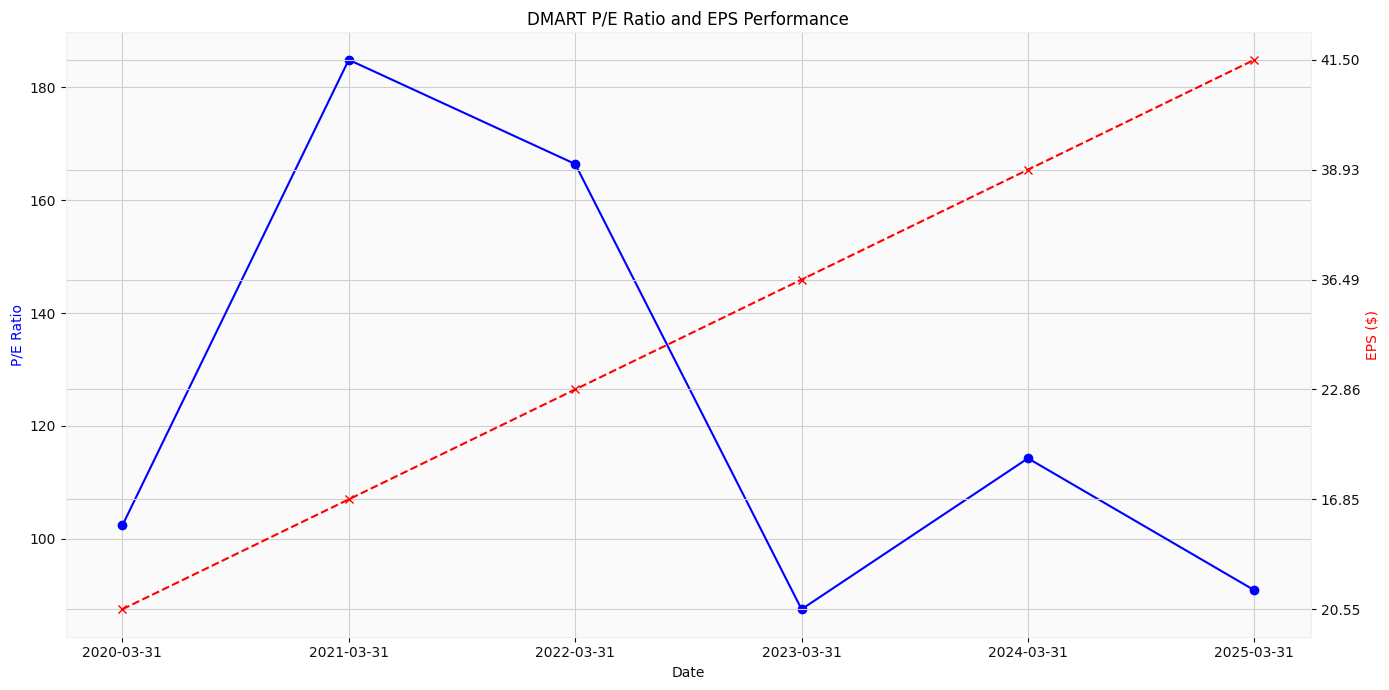

In [163]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax1 = plt.subplots(figsize=(14, 7))  # <- Aquí está la corrección
ax1.plot(pes.index, pes.values, color="blue", marker='o', label="P/E Ratio")
ax1.set_xlabel("Date")
ax1.set_ylabel("P/E Ratio", color="blue")

ax2 = ax1.twinx()
ax2.plot(eps.index, eps.values, color="red", marker='x', linestyle='--', label="EPS")
ax2.set_ylabel("EPS ($)", color="red")

plt.title(f"DMART P/E Ratio and EPS Performance")
fig.tight_layout()

plt.show()


In [164]:
pes

2020-03-31    102.36
2021-03-31    184.90
2022-03-31    166.43
2023-03-31     87.50
2024-03-31    114.26
2025-03-31     90.87
dtype: float64

In [81]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import logging

def get_indian_share_performance(
    ticker_symbol: str,
    filing_date: str | datetime,
    save_path: str,
    benchmark_ticker: str = "NIFTYBEES.NS"
) -> str:
    """
    Plots the indexed performance of an Indian stock against a benchmark ETF (default: NIFTYBEES.NS)
    over the past year, rebased to 100 for comparison.
    """
    # Convert date string to datetime
    if isinstance(filing_date, str):
        filing_date = datetime.strptime(filing_date, "%Y-%m-%d")

    start = filing_date - timedelta(days=365)
    end = filing_date

    # Append .NS for NSE if not already present
    if not ticker_symbol.endswith(".NS"):
        ticker_symbol += ".NS"

    # Fetch data
    try:
        # Target stock data
        target_df = yf.download(ticker_symbol, start=start, end=end)
        target_df.reset_index(inplace=True, drop=False)
        target_df.columns = target_df.columns.get_level_values(0)
        target_df = target_df[['Date', 'Close']]
        target_df.set_index('Date', inplace=True)

        # Benchmark data
        benchmark_df = yf.download(benchmark_ticker, start=start, end=end)
        benchmark_df.reset_index(inplace=True, drop=False)
        benchmark_df.columns = benchmark_df.columns.get_level_values(0)
        benchmark_df = benchmark_df[['Date', 'Close']]
        benchmark_df.set_index('Date', inplace=True)

    except Exception as e:
        logging.error(f"Data download failed: {e}")
        return f"Data download failed: {e}"

    if target_df.empty or benchmark_df.empty:
        error_msg = f"Could not retrieve data for {ticker_symbol} or {benchmark_ticker}."
        logging.error(error_msg)
        return error_msg

    # Combine and align
    combined_df = pd.DataFrame({
        'target': target_df['Close'],
        'benchmark': benchmark_df['Close']
    })
    combined_df.ffill(inplace=True)
    combined_df.dropna(inplace=True)

    if combined_df.empty:
        error_msg = f"Aligned data is empty after processing."
        logging.error(error_msg)
        return error_msg

    # Normalize to 100
    normalized_df = (combined_df / combined_df.iloc[0]) * 100

    # Plot
    plt.figure(figsize=(14, 7))
    plt.plot(normalized_df.index, normalized_df['target'], label=f'{ticker_symbol.replace('.NS', '')} Indexed Performance', color="blue")
    plt.plot(normalized_df.index, normalized_df['benchmark'], label=f'{benchmark_ticker.replace('.NS', '')} Indexed Performance', color="red")

    plt.title(f'{ticker_symbol.replace('.NS', '')} vs {benchmark_ticker.replace('.NS', '')} - Indexed Performance Over the Past Year')
    plt.xlabel("Date")
    plt.ylabel("Normalized Price (Base 100)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

    return f"Share performance chart saved to <img src='{save_path}'>"

get_indian_share_performance(
    ticker_symbol="DMART",
    filing_date="2024-04-01",
    save_path="./TEST/indian_share_performance.png")

C:\Users\esteb\AppData\Local\Temp\ipykernel_14080\268801962.py:31: FutureWarning: YF.download() has changed argument auto_adjust default to True
  target_df = yf.download(ticker_symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
C:\Users\esteb\AppData\Local\Temp\ipykernel_14080\268801962.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  benchmark_df = yf.download(benchmark_ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


"Share performance chart saved to <img src='./TEST/indian_share_performance.png'>"

In [76]:
target_df = yf.download('DMART.NS', start="2024-01-01", end='2025-01-01', keepna=True)
benchmark_df = yf.download("NIFTYBEES.NS", start="2024-01-01", end='2025-01-01')

C:\Users\esteb\AppData\Local\Temp\ipykernel_14080\3529637530.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  target_df = yf.download('DMART.NS', start="2024-01-01", end='2025-01-01', keepna=True)
[*********************100%***********************]  1 of 1 completed
C:\Users\esteb\AppData\Local\Temp\ipykernel_14080\3529637530.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  benchmark_df = yf.download("NIFTYBEES.NS", start="2024-01-01", end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


In [ ]:
# After downloading:
target_df.reset_index(inplace=True, drop=False)
target_df.reset_index(inplace=True, drop=False)
target_df.columns = target_df.columns.get_level_values(0)
target_df = target_df[['Date', 'Close']]
target_df.set_index('Date', inplace=True)
target_df.index  # Remove the first level of column names if it exists


DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-08', '2024-01-09', '2024-01-10',
               '2024-01-11', '2024-01-12',
               ...
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', name='Date', length=246, freq=None)

In [82]:
from tools.report_utils_india import make_api_request2

make_api_request2("IndianMarket", "/historical_stats", {'stock_name': 'DMART', 'stats': 'yoy_results',})

{'Sales': {'Mar 2014': 4686.0,
  'Mar 2015': 6439.0,
  'Mar 2016': 8584.0,
  'Mar 2017': 11898.0,
  'Mar 2018': 15033.0,
  'Mar 2019': 20005.0,
  'Mar 2020': 24870.0,
  'Mar 2021': 24143.0,
  'Mar 2022': 30976.0,
  'Mar 2023': 42840.0,
  'Mar 2024': 50789.0,
  'Mar 2025': 59358.0},
 'Expenses': {'Mar 2014': 4345.0,
  'Mar 2015': 5983.0,
  'Mar 2016': 7919.0,
  'Mar 2017': 10929.0,
  'Mar 2018': 13680.0,
  'Mar 2019': 18371.0,
  'Mar 2020': 22742.0,
  'Mar 2021': 22398.0,
  'Mar 2022': 28474.0,
  'Mar 2023': 39201.0,
  'Mar 2024': 46683.0,
  'Mar 2025': 54871.0},
 'Operating Profit': {'Mar 2014': 341.0,
  'Mar 2015': 456.0,
  'Mar 2016': 664.0,
  'Mar 2017': 969.0,
  'Mar 2018': 1353.0,
  'Mar 2019': 1633.0,
  'Mar 2020': 2128.0,
  'Mar 2021': 1745.0,
  'Mar 2022': 2502.0,
  'Mar 2023': 3639.0,
  'Mar 2024': 4106.0,
  'Mar 2025': 4487.0},
 'OPM %': {'Mar 2014': 7.0,
  'Mar 2015': 7.0,
  'Mar 2016': 8.0,
  'Mar 2017': 8.0,
  'Mar 2018': 9.0,
  'Mar 2019': 8.0,
  'Mar 2020': 9.0,
  'Mar 2

In [ ]:
def get_financial_metrics(
    ticker_symbol: str,
    save_path: str,
    years: int = 5,
    **kwargs
) -> str:

    """
    Returns a DataFrame containing financial metrics for the last N years for a given ticker symbol,
    with years as columns and metrics as rows.
    """
    all_metrics_by_year = defaultdict(dict)
    params = {"limit": years + 1}
    # Fetch each endpoint via make_api_request (using /stable)
    income_data = make_api_request("FMP", f"/income-statement?symbol={ticker_symbol}", params)
    key_metrics_data = make_api_request("FMP", f"/key-metrics?symbol={ticker_symbol}", params)
    ratios_data = make_api_request("FMP", f"/ratios?symbol={ticker_symbol}", params)
    cashflow_data = make_api_request("FMP", f"/cash-flow-statement?symbol={ticker_symbol}", params)
    profile_data = make_api_request("FMP", f"/profile?symbol={ticker_symbol}")
    # Handle error cases up front
    if any('error' in x for x in [income_data, key_metrics_data, ratios_data, cashflow_data]):
        return pd.DataFrame(), "USD", ticker_symbol.upper()
    if not all(isinstance(x, list) for x in [income_data, key_metrics_data, ratios_data, cashflow_data]):
        return pd.DataFrame(), "USD", ticker_symbol.upper()

    # --- Process metrics by year ---
    for i in range(min(years, len(income_data))):
        if i < len(key_metrics_data) and i < len(ratios_data) and i < len(cashflow_data):
            income = income_data[i]
            key_metrics = key_metrics_data[i]
            ratios = ratios_data[i]
            cashflow = cashflow_data[i]
            free_cash_flow = cashflow.get("freeCashFlow", 0)

            revenue = income.get("revenue", 0)
            gross_profit = income.get("grossProfit", 0)
            net_income = income.get("netIncome", 1e-9) or 1e-9

            metrics = {
                "Revenue": round(revenue / 1e6),
                "Gross Profit": round(gross_profit / 1e6),
                "Gross Margin": round((gross_profit / revenue) if revenue else 0, 2),
                "EBITDA": round(income.get("ebitda", 0) / 1e6),
                "EBITDA Margin": round(ratios.get("ebitdaMargin", 0), 2),
                "FCF": round(free_cash_flow / 1e6),
                "FCF Conversion": round((free_cash_flow / net_income), 2),
                "ROIC": f"{round(key_metrics.get('returnOnInvestedCapital', 0) * 100, 1)}%",
                "EV/EBITDA": round(key_metrics.get("evToEBITDA", 0), 2),
                "PE Ratio": round(ratios.get("priceToEarningsRatio", 0), 2),
                "PB Ratio": round(ratios.get("priceToBookRatio", 0), 2),
                "CFO": round(cashflow.get("operatingCashFlow", 0) / 1e6),
            }

            # Revenue growth (YoY)
            revenue_growth_val = "N/A"
            if i + 1 < len(income_data):
                prev_revenue = income_data[i + 1].get("revenue", 0)
                if prev_revenue:
                    growth = ((revenue - prev_revenue) / prev_revenue) * 100
                    revenue_growth_val = f"{round(growth, 1)}%"
            metrics["Revenue Growth"] = revenue_growth_val

            year = income.get("date", str(pd.Timestamp.now().year - i))[:4]
            all_metrics_by_year[year].update(metrics)

    # --- Create DataFrame ---
    df = pd.DataFrame(all_metrics_by_year)
    kpi_order = [
        "Revenue", "Revenue Growth", "Gross Profit", "Gross Margin", 
        "EBITDA", "EBITDA Margin", "FCF", "FCF Conversion", "ROIC",
        "EV/EBITDA", "PE Ratio", "PB Ratio", "CFO"
    ]
    df = df.reindex(kpi_order).dropna(how='all')

    # Currency and company name (fallbacks)
    currency = income_data[0].get("reportedCurrency", "USD")
    name = ticker_symbol.upper()
    if isinstance(profile_data, list) and profile_data:
        profile = profile_data[0]
        currency = profile.get("currency", currency)
        name = profile.get("companyName", name)

    # --- SAVE TO FILE if save_path is given ---
    if save_path:
        try:
            # Save as JSON for consistency (easy reloading)
            df_json = df.to_dict(orient="index")
            with open(save_path, "w", encoding="utf-8") as f:
                json.dump({
                    "currency": currency,
                    "company_name": name,
                    "metrics": df_json
                }, f, indent=2)
            logging.info(f"Financial metrics saved to {save_path}")
        except Exception as e:
            logging.error(f"Failed to save financial metrics: {e}")

    return df.sort_index(axis=1), currency, name